#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Edición 2022**

#Trabajo práctico entregable - Parte 2
**GRUPO 17**

**Conrrero, Agustina**

**Sanchez Herrera, Carlos**

**Serrantes, Sebastian**

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve,auc

from IPython.display import Image
from IPython.core.display import HTML

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
# Damos acceso al Drive para importar los archivos con los que vamos a trabajar
from google.colab import drive
import pandas as pd
from google.colab import files 

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SHARED_FOLDER_ALIAS = 'DiplomaturaGrupo17'
DATASETS_PATH = '/content/drive/MyDrive/' + SHARED_FOLDER_ALIAS + '/IntroML/data/'

In [ ]:
#!ls {DATASETS_PATH}

In [ ]:
# Datos etiquetados
path = DATASETS_PATH + 'loan_data.csv'
dataset = pd.read_csv (path, comment="#")

dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [ ]:

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [ ]:
dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos está obtenido del departamento de créditos de un banco. El mismo contiene información sobre 5960 préstamos para créditos hipotecarios y los datos estan categorizados según hayan caído en default o no.

2. La variable a predecir TARGET es de tipo binaria (0-1). Los valores nulos corresponden a aquellos créditos que han sido cnacelados, mientras que los 1 son aquellos que han incumplido. 

3. Hay 12 atributos disponibles: 

LOAN: Monto de la solicitud de préstamo
 
MORTDUE: Monto adeudado de la hipoteca existente
 
VALUE: Valor de la propiedad actual
 
YOJ: Años en el trabajo actual
 
DEROG: Número de informes importantes derogados 
 
DELINQ: Número de líneas de crédito morosas
 
CLAGE: Antigüedad de la línea comercial más antigua en meses
 
NINQ: Número de líneas de crédito recientes
 
CLNO: Número de líneas de crédito
 
DEBTINC: Relación deuda-ingresos

4) Consideramos que los atributos que más podrían ayudar para la predicción son: LOAN,  MORTDUE, DELINQ y DEBTINC


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

#Ejercicio 2:
##Visualizacion del conteo de la variable target 
Como se muestra en el siguiente gráfico, la variable objetivo TARGET se encuentra muy desbalanceada: la mayoría de los datos corresponden a créditos que no entraron en default (valor 0 de la variable TARGET). 

Por lo tanto, el medir la efectividad del modelo teniendo en cuenta la cantidad de aciertos lleva un sesgo asociado. Es por ello que, tenemos en claro que se deberían evitar los falsos negativos (modelo prediciendo un valor 0 cuando correspondería un 1). 

Uno de los objetivos será ubicarnos en un punto de la curva ROC que permita optimizar los resultados buscamos. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


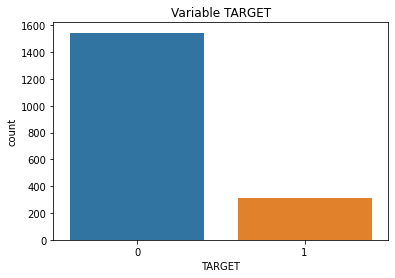

In [ ]:
sns.countplot(dataset.TARGET)
plt.title("Variable TARGET")
plt.show()  

##Ajuste del modelo:

Decidimos escalar la variable ya que SGDC es altamente sensible a la escala. Es por ello que, decidimos utilizar MaxMinScaler para tener las variables en el rango 0-1. 
https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use

In [ ]:
scaler=MinMaxScaler()
sgd=SGDClassifier(random_state=0)

model = make_pipeline(scaler,sgd)
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [ ]:
y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_train_pred))

print("TESTEO")
print(classification_report(y_test, y_test_pred))

ENTRENAMIENTO
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1232
           1       0.80      0.34      0.48       251

    accuracy                           0.87      1483
   macro avg       0.84      0.66      0.70      1483
weighted avg       0.87      0.87      0.85      1483

TESTEO
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       313
           1       0.74      0.34      0.47        58

    accuracy                           0.88       371
   macro avg       0.82      0.66      0.70       371
weighted avg       0.87      0.88      0.86       371



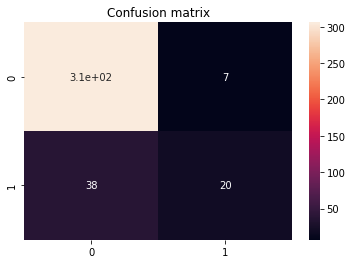

In [ ]:

cm=confusion_matrix(y_test,y_test_pred)

sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")     
plt.show()

Como se muestra anteriormente, estamos en presencia de un caso de alta precisión y bajo recall para la clase 1. Esto significa que, el modelo no predecirá adecuadamente la clase 1 en la totalidad de los casos, pero que, cuando lo haga, lo hará con alta eficacia. 
Sin embargo, el modelo precedirá correctamente la clase 0. 


Esto puede ser debido al desbalance de las clases visto en el punto anterior. Para ello, se pueden implementar estrategias de balanceo como oversampling y undersampling.

### Balanceo de las clases


Debido a que las clases de la variable target estan muy desbalanceadas, se decidió probar con un balanceador de clases `class_weight=’balanced’` como hiperparámetro del modelo: 

In [ ]:
scaler=MinMaxScaler()
sgd=SGDClassifier(random_state=0, class_weight='balanced')

model = make_pipeline(scaler,sgd)
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier',
                 SGDClassifier(class_weight='balanced', random_state=0))])

In [ ]:
y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_train_pred))

print("TESTEO")
print(classification_report(y_test, y_test_pred))

ENTRENAMIENTO
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1232
           1       0.67      0.44      0.53       251

    accuracy                           0.87      1483
   macro avg       0.78      0.70      0.73      1483
weighted avg       0.86      0.87      0.86      1483

TESTEO
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       313
           1       0.67      0.41      0.51        58

    accuracy                           0.88       371
   macro avg       0.78      0.69      0.72       371
weighted avg       0.86      0.88      0.86       371



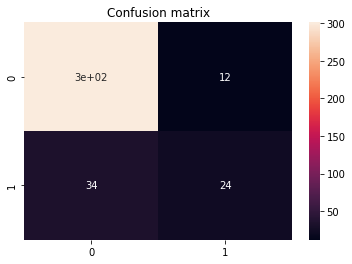

In [ ]:

cm=confusion_matrix(y_test,y_test_pred)

sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")     
plt.show()

El balanceo de clases mejoró la predicción, lo cual se puede ver reflejado en valores más altos de las métricas del classification report y de la matriz de confusión.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
parameters={'sgd__loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'sgd__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'sgd__penalty':['l1','l2']}

Realizamos una validación cruzada con el modelo de descenso de gradiente y la grilla de hiperparámetros. A su vez, utilizamos el parámetro "class weight" de SGD Classifier para balancear el dataset durante el entrenamiento. 

A su vez, cambiamos la metrica seleccionada por defecto, accuracy, ya que al tratarse de un dataset desbalanceado en la variable objetivo, no se trata de la mejor métrica para evaluar la eficacia de la predicción del modelo. Es por ello que, elegimos "balanced accuracy score".



"Empíricamente, encontramos que SGD converge después de observar aproximadamente 10 ^ 6 muestras de entrenamiento. Por lo tanto, una primera estimación razonable del número de iteraciones es max_iter = np.ceil (10 ** 6 / n), donde n es el tamaño del conjunto de entrenamiento."

https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use

In [ ]:
max_iter=np.ceil(10**6 / X_train.shape[0])

In [ ]:
scaler=MinMaxScaler()
sgd= SGDClassifier(random_state=0,class_weight='balanced',max_iter=max_iter)

pipe = Pipeline(steps=[('scaler', scaler), ('sgd', sgd)])

cv = GridSearchCV(pipe, parameters, scoring='balanced_accuracy', cv=5,refit=True,n_jobs=-1)     
cv.fit(X_train, y_train);

In [ ]:
results = cv.cv_results_
results

{'mean_fit_time': array([0.01005492, 0.00967155, 0.01496401, 0.01258883, 0.01693282,
        0.01377029, 0.08738675, 0.04622493, 0.01638503, 0.01103082,
        0.00756302, 0.00759997, 0.01090584, 0.00918684, 0.01132536,
        0.00790391, 0.03069334, 0.03556294, 0.00845771, 0.0072926 ,
        0.00739861, 0.00746446, 0.01194143, 0.007234  , 0.00891447,
        0.00694199, 0.01563158, 0.06030993, 0.00651708, 0.00579548,
        0.00590687, 0.00532284, 0.00683923, 0.00711656, 0.00648532,
        0.00612364, 0.03041658, 0.0057642 , 0.005269  , 0.00484476,
        0.00736589, 0.00549922, 0.00772624, 0.00867934, 0.00603967,
        0.00566902, 0.00893383, 0.00575767, 0.00605927, 0.00864925,
        0.00900998, 0.00954509, 0.01051373, 0.00920548, 0.03517666,
        0.02189589, 0.01978345, 0.01148415, 0.00831747, 0.01003442,
        0.00489998, 0.0052897 , 0.00614986, 0.00767775, 0.01440449,
        0.01104875, 0.01428895, 0.01088777, 0.00627971, 0.00582805]),
 'std_fit_time': array([0.001

In [ ]:
cv.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('sgd',
                 SGDClassifier(alpha=0.001, class_weight='balanced',
                               max_iter=675.0, penalty='l1', random_state=0))])

In [ ]:
cv.best_params_

{'sgd__alpha': 0.001, 'sgd__loss': 'hinge', 'sgd__penalty': 'l1'}

In [ ]:
cv.best_score_

0.7171585685325774

In [ ]:
scaler=MinMaxScaler()

sgd=SGDClassifier(alpha=0.001, loss='hinge', penalty='l1',class_weight='balanced',
              random_state=0,max_iter=max_iter)


best_model=make_pipeline(scaler,sgd)

best_model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.001, class_weight='balanced',
                               max_iter=675.0, penalty='l1', random_state=0))])

In [ ]:
y_train_pred_best= best_model.predict(X_train)
y_test_pred_best= best_model.predict(X_test)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_train_pred_best))

print("TESTEO")
print(classification_report(y_test, y_test_pred_best))

ENTRENAMIENTO
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1232
           1       0.44      0.60      0.51       251

    accuracy                           0.80      1483
   macro avg       0.67      0.72      0.69      1483
weighted avg       0.83      0.80      0.81      1483

TESTEO
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       313
           1       0.47      0.66      0.55        58

    accuracy                           0.83       371
   macro avg       0.70      0.76      0.72       371
weighted avg       0.86      0.83      0.84       371



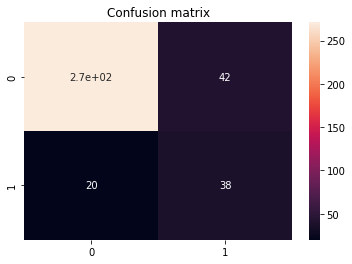

In [ ]:
cm=confusion_matrix(y_test,y_test_pred_best)

sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")   
plt.show()

Se reajustaron 70 modelos diferentes e identificamos al mejor modelo al que cumplia con los parámetros: 

- alpha': 0.001

- 'penalty': 'l1'

- 'loss': 'hinge'

En comparación al modelo con parámetros establecidos por default, pareciera que este modelo predice mejor a la clase minoritaria. 

De todas maneras, creemos que se deberían reducir los falsos negativos. Pudimos observar que en un umbral del 50%, los mismos se reducen. El umbral de probabilidad se puede obtener utilizando el índice de Youden a través de las curvas ROC. 

In [ ]:
def find_cutoff_roc(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tpr': pd.Series(tpr),
                        'fpr' : pd.Series(fpr),
                        'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t=roc.iloc[(roc.tf-0).abs().argsort()][:1]

    return list(roc_t['threshold']),roc

In [ ]:
threshold,roc_df=find_cutoff_roc(y_test, best_model.decision_function(X_test))
print("El umbral óptimo es : {:.6f}".format(threshold[0]))

El umbral óptimo es : -0.208925


In [ ]:
roc_df[roc_df.threshold==threshold[0]]

,tpr,fpr,tf,threshold
46,0.775862,0.226837,0.002699,-0.208925


In [ ]:
def plot_roc_auc(actual, preds,optimal_tpr,optimal_fpr):
    
    fig,axs=plt.subplots(nrows=1,ncols=2,sharex=False,figsize=(10,5))
    
    fpr, tpr, thresholds = roc_curve(actual, preds)
    roc_auc = auc(fpr, tpr)
    axs[0].plot(fpr, tpr,'r')
    axs[0].plot([0,1],[0,1],'b')
    axs[0].set_title('AUC: {}'.format(roc_auc))
    axs[0].set_xlabel('FPR')
    axs[0].set_ylabel('TPR')
    axs[0].hlines(y=optimal_tpr,color='g',xmin=0,xmax=1,linestyles='dotted')
    axs[0].vlines(x=optimal_fpr,color='g',ymin=0,ymax=1,linestyles='dotted')
    
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
    roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    
    # Plot tpr vs 1-fpr
    axs[1].plot(roc['tpr'])
    axs[1].plot(roc['1-fpr'], color = 'red')
    axs[1].set_xlabel('1-FPR')
    axs[1].set_ylabel('TPR')
    axs[1].set_title('Receiver operating characteristic')
    axs[1].set_xticklabels([])
    plt.show()

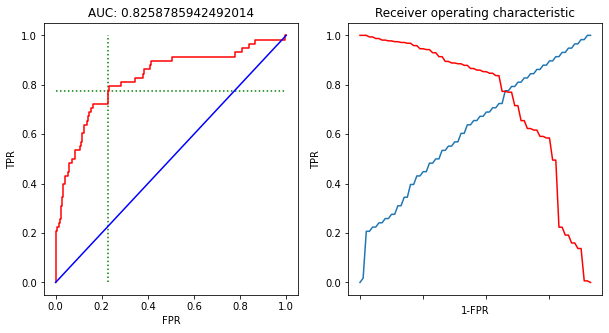

In [ ]:
plot_roc_auc(y_test,  best_model.decision_function(X_test) ,0.775862,0.226837)

In [ ]:
X_test_predicciones=X_test.reset_index(drop=True)
X_test_predicciones['predicciones']=best_model.decision_function(X_test)
X_test_predicciones.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,predicciones
0,4200,50216.0,58541.0,19.0,0.0,0.0,209.871302,0.0,19.0,20.208033,-1.641663
1,19300,50554.0,76140.0,9.0,2.0,0.0,78.276625,3.0,27.0,36.026904,1.248928
2,13000,78766.0,106450.0,6.0,0.0,0.0,107.951312,0.0,26.0,24.870994,-1.024786
3,11800,67678.0,108092.0,13.0,0.0,7.0,126.658232,0.0,36.0,37.162690,4.027847
4,87500,55938.0,86794.0,15.0,0.0,0.0,223.881040,0.0,16.0,36.753653,-1.536803


In [ ]:
X_test_predicciones['prediccion']=X_test_predicciones['predicciones'].apply(lambda x: 1 if x>threshold[0] else 0 )
X_test_predicciones

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,predicciones,prediccion
0,4200,50216.0,58541.0,19.0,0.0,0.0,209.871302,0.0,19.0,20.208033,-1.641663,0
1,19300,50554.0,76140.0,9.0,2.0,0.0,78.276625,3.0,27.0,36.026904,1.248928,1
2,13000,78766.0,106450.0,6.0,0.0,0.0,107.951312,0.0,26.0,24.870994,-1.024786,0
3,11800,67678.0,108092.0,13.0,0.0,7.0,126.658232,0.0,36.0,37.162690,4.027847,1
4,87500,55938.0,86794.0,15.0,0.0,0.0,223.881040,0.0,16.0,36.753653,-1.536803,0
...,...,...,...,...,...,...,...,...,...,...,...,...
366,79100,23553.0,103807.0,25.0,0.0,1.0,142.193458,0.0,13.0,31.469937,-0.768735,0
367,16300,79087.0,102921.0,23.0,0.0,0.0,256.253084,0.0,45.0,36.987086,-1.378780,0
368,26900,72848.0,101736.0,10.0,0.0,0.0,131.409634,0.0,21.0,36.369027,-0.615816,0
369,13000,80587.0,110064.0,6.0,0.0,0.0,85.009197,1.0,13.0,33.990040,-0.180998,1


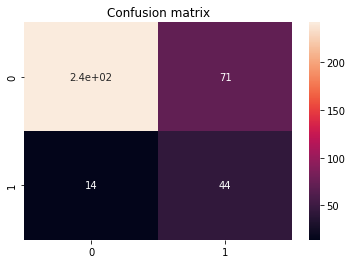

In [ ]:
cm=confusion_matrix(y_test,X_test_predicciones.prediccion)

sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")   
plt.show()

In [ ]:
print(classification_report(y_test, X_test_predicciones.prediccion))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       313
           1       0.38      0.76      0.51        58

    accuracy                           0.77       371
   macro avg       0.66      0.77      0.68       371
weighted avg       0.86      0.77      0.80       371



Debido que quisimos disminuir el número de Falsos Negativos, se disminuyó la precisión del model debido al aumento del recall. 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
model=DecisionTreeClassifier(random_state=0) 
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_train_pred= model.predict(X_train)
y_test_pred=model.predict(X_test)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_train_pred))

print("TESTEO")
print(classification_report(y_test, y_test_pred))

ENTRENAMIENTO
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

TESTEO
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



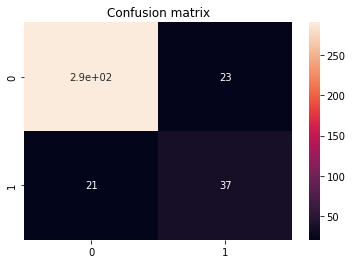

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)

sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")   
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    'max_depth': [2,3,4,5,10,15,20,25,30],
    "min_samples_leaf": [2,3,4,5,10,15,20,25,30],
    "min_samples_split": [2,3,4,5,6,7,8,9,10,15,20,25,30]
}

In [ ]:
model = DecisionTreeClassifier(random_state=0,class_weight='balanced')

cv = GridSearchCV(model, param_grid, scoring='balanced_accuracy', cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 10, 15, 20, 25, 30],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                               20, 25, 30]},
             scoring='balanced_accuracy')

In [ ]:
results = cv.cv_results_

In [ ]:
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', "param_min_samples_leaf","param_min_samples_split",'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')[:30]

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score,rank_test_score
476,gini,10,2,10,0.748965,0.050394,1
475,gini,10,2,9,0.748965,0.051703,1
710,gini,20,2,10,0.746243,0.042647,3
593,gini,15,2,10,0.746243,0.042647,3
827,gini,25,2,10,0.746243,0.042647,3
944,gini,30,2,10,0.746243,0.042647,3
471,gini,10,2,5,0.745836,0.047590,7
936,gini,30,2,2,0.745675,0.043632,8
937,gini,30,2,3,0.745675,0.043632,8
938,gini,30,2,4,0.745675,0.043632,8


In [ ]:
cv.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=9, random_state=0)

In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 9}

In [ ]:
best_model=DecisionTreeClassifier(criterion="gini", max_depth=15, min_samples_leaf=2, min_samples_split=2,random_state=0,class_weight='balanced')
best_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=2, random_state=0)

In [ ]:
y_train_pred_best= best_model.predict(X_train)
y_test_pred_best= best_model.predict(X_test)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_train_pred_best))

print("TESTEO")
print(classification_report(y_test, y_test_pred_best))

ENTRENAMIENTO
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1232
           1       0.85      1.00      0.92       251

    accuracy                           0.97      1483
   macro avg       0.93      0.98      0.95      1483
weighted avg       0.97      0.97      0.97      1483

TESTEO
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       313
           1       0.54      0.74      0.62        58

    accuracy                           0.86       371
   macro avg       0.74      0.81      0.77       371
weighted avg       0.88      0.86      0.87       371



Para todos los casos, se obtuvieron mejores métricas en el entrenamiento que en el testeo, como era de esperarse. Sin embargo, consideramos que los valores obtenidos no son considerablemente diferentes, por lo que probablemente no hubo sobreajuste. 

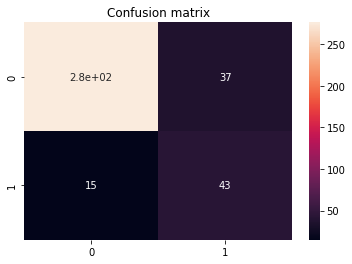

In [ ]:
cm=confusion_matrix(y_test,y_test_pred_best)

sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")
plt.show()

Si comparamos ambas matrices de confusión, podemos observar que en el segundo caso disminuyeron los (0,0) y aumentaron los true positives (1,1). Esto es importante ya que lo más relevante es poder predecir correctamente a los créditos que podrían entrar en default, lo que se vio aumentado en esta última instancia. 


 El parámetro max_depth es quien marca la diferencia entre ambos modelos. El mismo es un indicador de complejidad en los árboles de decisión, el mismo permite que los nodos crezcan, hasta determinado valor, obteniendose nodos puros si el valor es None. 

##Conclusion
Como conclusion, podemos afirmar que es necesario utilizar y entrenar un modelo el cual prediga correctamente los valores positivos para aquellas personas que caen en default como primera instancia. Además, es importante que los falsos negativos y positivos no sean tan elevados, pero a la hora de poner los mismos en la balanza, es preferible que un valor que no caería en default esté catalogado al reves, a que suceda lo contrario. 

Es por ello que, con este dataset nosotros sugerimos utilizar el modelo que utiliza Random Forest ya que las métricas se vieron beneficiadas acorde a lo que estamos buscando. 